In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller

In [57]:
import pandas as pd

# Load the parquet data
df = pd.read_parquet('train_data.parquet')

# Display the loaded data
df.head()

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.008092,NaN
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.008092,NaN
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.008092,NaN
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.008092,NaN


In [94]:
import pandas as pd
import seaborn as sns
from scipy import stats


# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include='number'))

# Identify outliers based on Z-scores
outliers = (z_scores > 3) | (z_scores < -3)

# Display outliers
outliers_df = df[outliers.any(axis=1)]
print(outliers_df.count())


brand            340735
phase            340735
country          340735
dayweek          340735
month            340735
wd_perc          340735
ther_area        293294
hospital_rate    278711
n_nwd_bef        340735
n_nwd_aft        340735
n_weekday_0      340735
n_weekday_1      340735
n_weekday_2      340735
n_weekday_3      340735
n_weekday_4      340735
date             340735
wd               340735
wd_left          340735
monthly          340735
main_channel     278711
dtype: int64


In [129]:
# Filter the data for the current species and elevation combination
group_df = df[(df['country']=='Themyscira') & (df['brand'] == 'EUJWP')]
# Sort the DataFrame by the 'Date' column in ascending order
group_df = group_df.sort_values(by='date')
group_df

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
2831817,EUJWP,0.000000,Themyscira,2.0,1.0,0.045455,A,0.00757,11.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.064667,RETAIL
2831818,EUJWP,0.057841,Themyscira,3.0,1.0,0.090909,A,0.00757,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.064667,RETAIL
2831819,EUJWP,0.094534,Themyscira,4.0,1.0,0.136364,A,0.00757,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.064667,RETAIL
2831820,EUJWP,0.011172,Themyscira,0.0,1.0,0.181818,A,0.00757,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.064667,RETAIL
2831821,EUJWP,0.114971,Themyscira,1.0,1.0,0.227273,A,0.00757,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.064667,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833061,EUJWP,0.119752,Themyscira,2.0,2.0,0.789474,A,0.00757,0.0,0.0,7,8,8,8,8,2018-02-21,15,4,0.045623,RETAIL
2833062,EUJWP,0.110119,Themyscira,3.0,2.0,0.842105,A,0.00757,0.0,0.0,7,8,8,8,8,2018-02-22,16,3,0.045623,RETAIL
2833063,EUJWP,0.014874,Themyscira,4.0,2.0,0.894737,A,0.00757,0.0,4.0,7,8,8,8,8,2018-02-23,17,2,0.045623,RETAIL
2833064,EUJWP,0.021526,Themyscira,0.0,2.0,0.947368,A,0.00757,0.0,0.0,7,8,8,8,8,2018-02-26,18,1,0.045623,RETAIL


In [130]:
# Convert the 'date' column to a datetime type if it's not already
group_df['date'] = pd.to_datetime(group_df['date'])

# Use boolean indexing to filter out rows for the year 2018
group_df = group_df[group_df['date'].dt.year != 2018]

In [131]:
group_df

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
2831817,EUJWP,0.000000,Themyscira,2.0,1.0,0.045455,A,0.00757,11.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.064667,RETAIL
2831818,EUJWP,0.057841,Themyscira,3.0,1.0,0.090909,A,0.00757,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.064667,RETAIL
2831819,EUJWP,0.094534,Themyscira,4.0,1.0,0.136364,A,0.00757,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.064667,RETAIL
2831820,EUJWP,0.011172,Themyscira,0.0,1.0,0.181818,A,0.00757,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.064667,RETAIL
2831821,EUJWP,0.114971,Themyscira,1.0,1.0,0.227273,A,0.00757,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.064667,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833021,EUJWP,0.058273,Themyscira,0.0,12.0,0.750000,A,0.00757,4.0,0.0,6,6,6,7,9,2017-12-18,12,4,0.054658,RETAIL
2833022,EUJWP,0.035653,Themyscira,1.0,12.0,0.812500,A,0.00757,0.0,0.0,6,6,6,7,9,2017-12-19,13,3,0.054658,RETAIL
2833023,EUJWP,0.040135,Themyscira,2.0,12.0,0.875000,A,0.00757,0.0,0.0,6,6,6,7,9,2017-12-20,14,2,0.054658,RETAIL
2833024,EUJWP,0.000223,Themyscira,3.0,12.0,0.937500,A,0.00757,0.0,0.0,6,6,6,7,9,2017-12-21,15,1,0.054658,RETAIL


In [132]:

# Set the 'date' column as the index
group_df.set_index('date', inplace=True)

# Generate a date range for the years 2013 to 2018
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2017-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex the DataFrame with the generated date range
group_df = group_df.reindex(date_range)


# Reset the index if needed
group_df.reset_index(inplace=True)

# Now, df contains all the missing dates from 2013 to 2018, and you can continue working with it


In [133]:
import numpy as np

# Find indices of NaN values
nan_indices = np.where(np.isnan(group_df))[0]

# Initialize a counter for consecutive NaN values
consecutive_nan_count = 0

# Check if there are NaN values and count consecutive occurrences
if len(nan_indices) > 0:
    for i in range(len(nan_indices) - 1):
        if nan_indices[i + 1] == nan_indices[i] + 1:
            consecutive_nan_count += 1
        else:
            break

# Add consecutive_nan_count to each NaN
if consecutive_nan_count > 0:
    group_df[nan_indices[0]:nan_indices[0] + consecutive_nan_count + 1] += consecutive_nan_count


TypeError: Object with dtype category cannot perform the numpy op isnan

In [134]:
group_df

,index,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,wd,wd_left,monthly,main_channel
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,EUJWP,0.000000,Themyscira,2.0,1.0,0.045455,A,0.00757,11.0,0.0,4.0,4.0,5.0,5.0,4.0,1.0,21.0,0.064667,RETAIL
2,2013-01-03,EUJWP,0.057841,Themyscira,3.0,1.0,0.090909,A,0.00757,0.0,0.0,4.0,4.0,5.0,5.0,4.0,2.0,20.0,0.064667,RETAIL
3,2013-01-04,EUJWP,0.094534,Themyscira,4.0,1.0,0.136364,A,0.00757,0.0,2.0,4.0,4.0,5.0,5.0,4.0,3.0,19.0,0.064667,RETAIL
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2017-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1822,2017-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,2017-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,2017-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:

# Convert the 'date' column to a datetime type if it's not already
group_df['index'] = pd.to_datetime(group_df['index'])

# Print the tail of the year 2016
df_2016 = group_df[(group_df['index'] >= '2014-01-01') & (group_df['index'] <= '2014-12-31')]
print(df_2016.tail(50))


         index  brand     phase     country  dayweek  month   wd_perc  \
680 2014-11-12  EUJWP  0.022389  Themyscira      2.0   11.0  0.400000   
681 2014-11-13  EUJWP  0.131187  Themyscira      3.0   11.0  0.450000   
682 2014-11-14  EUJWP  0.117166  Themyscira      4.0   11.0  0.500000   
683 2014-11-15    NaN       NaN         NaN      NaN    NaN       NaN   
684 2014-11-16    NaN       NaN         NaN      NaN    NaN       NaN   
685 2014-11-17  EUJWP  0.014312  Themyscira      0.0   11.0  0.550000   
686 2014-11-18  EUJWP  0.012255  Themyscira      1.0   11.0  0.600000   
687 2014-11-19  EUJWP  0.011221  Themyscira      2.0   11.0  0.650000   
688 2014-11-20  EUJWP  0.114144  Themyscira      3.0   11.0  0.700000   
689 2014-11-21  EUJWP  0.019229  Themyscira      4.0   11.0  0.750000   
690 2014-11-22    NaN       NaN         NaN      NaN    NaN       NaN   
691 2014-11-23    NaN       NaN         NaN      NaN    NaN       NaN   
692 2014-11-24  EUJWP  0.000000  Themyscira      0.

In [168]:
group_df_copy = group_df.copy()
group_df_copy['brand'].fillna(method='ffill', inplace=True)
group_df_copy['brand'].fillna(method='bfill', inplace=True)
group_df_copy['phase'].fillna(0, inplace=True)
group_df_copy['country'].fillna(method='ffill', inplace=True)
group_df_copy['country'].fillna(method='bfill', inplace=True)
# Fill NaN values in the 'month' column with the corresponding month values from the 'date' column
group_df_copy['month'].fillna(group_df['index'].dt.month, inplace=True)
# Fill NaN values in the 'hospital_rate' column with 0
group_df_copy['hospital_rate'].fillna(0, inplace=True)
# Fill NaN values in the 'dayweek' column with the repeating pattern starting from 1
group_df_copy.head(20)

,index,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,wd,wd_left,monthly,main_channel
0,2013-01-01,EUJWP,0.000000,Themyscira,NaN,1.0,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,EUJWP,0.000000,Themyscira,2.0,1.0,0.045455,A,0.00757,11.0,0.0,4.0,4.0,5.0,5.0,4.0,1.0,21.0,0.064667,RETAIL
2,2013-01-03,EUJWP,0.057841,Themyscira,3.0,1.0,0.090909,A,0.00757,0.0,0.0,4.0,4.0,5.0,5.0,4.0,2.0,20.0,0.064667,RETAIL
3,2013-01-04,EUJWP,0.094534,Themyscira,4.0,1.0,0.136364,A,0.00757,0.0,2.0,4.0,4.0,5.0,5.0,4.0,3.0,19.0,0.064667,RETAIL
4,2013-01-05,EUJWP,0.000000,Themyscira,NaN,1.0,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-01-06,EUJWP,0.000000,Themyscira,NaN,1.0,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-01-07,EUJWP,0.011172,Themyscira,0.0,1.0,0.181818,A,0.00757,2.0,0.0,4.0,4.0,5.0,5.0,4.0,4.0,18.0,0.064667,RETAIL
7,2013-01-08,EUJWP,0.114971,Themyscira,1.0,1.0,0.227273,A,0.00757,0.0,0.0,4.0,4.0,5.0,5.0,4.0,5.0,17.0,0.064667,RETAIL
8,2013-01-09,EUJWP,0.004855,Themyscira,2.0,1.0,0.272727,A,0.00757,0.0,0.0,4.0,4.0,5.0,5.0,4.0,6.0,16.0,0.064667,RETAIL
9,2013-01-10,EUJWP,0.236555,Themyscira,3.0,1.0,0.318182,A,0.00757,0.0,0.0,4.0,4.0,5.0,5.0,4.0,7.0,15.0,0.064667,RETAIL


In [173]:
import pandas as pd
import numpy as np

# Assuming group_df_copy is your DataFrame

# Function to add consecutive_nan_count to NaN values
def add_consecutive_count(value, i, df, column):
    
    # Check if the value is NaN
    if pd.isna(value):
        # Initialize consecutive_nan_count
        consecutive_nan_count = 0
        
        # Loop to find consecutive NaN values
        while i - consecutive_nan_count - 1 >= 0 and pd.isna(df.at[i - consecutive_nan_count - 1, column]):
            consecutive_nan_count += 1

        # Add the count to the NaN value
        return consecutive_nan_count

    return value

# Iterate over the DataFrame and apply the function to 'n_nwd_aft'
for i in range(len(group_df_copy) - 1):
    group_df_copy.at[i, 'n_nwd_aft'] = add_consecutive_count(group_df_copy.at[i, 'n_nwd_aft'], i, group_df_copy, 'n_nwd_aft')

# Handle the last value of 'n_nwd_aft'
last_index = len(group_df_copy) - 1
group_df_copy.at[last_index, 'n_nwd_aft'] = 0 if pd.isna(group_df_copy.at[last_index, 'n_nwd_aft']) else group_df_copy.at[last_index, 'n_nwd_aft']


# Iterate over the DataFrame in reverse and apply the function to 'n_nwd_bef'
for i in range(len(group_df_copy) - 1, 0, -1):
    group_df_copy.at[i, 'n_nwd_bef'] = add_consecutive_count(group_df_copy.at[i, 'n_nwd_bef'], i, group_df_copy, 'n_nwd_bef')


# Handle the first value of 'n_nwd_bef'
first_index = 0
group_df_copy.at[first_index, 'n_nwd_bef'] = 0 if pd.isna(group_df_copy.at[first_index, 'n_nwd_bef']) else group_df_copy.at[first_index, 'n_nwd_bef']


# Print the updated DataFrame
print(group_df_copy.tail(20))


          index  brand     phase     country  dayweek  month  wd_perc  \
1806 2017-12-12  EUJWP  0.038456  Themyscira      1.0   12.0   0.5000   
1807 2017-12-13  EUJWP  0.017365  Themyscira      2.0   12.0   0.5625   
1808 2017-12-14  EUJWP  0.074940  Themyscira      3.0   12.0   0.6250   
1809 2017-12-15  EUJWP  0.308836  Themyscira      4.0   12.0   0.6875   
1810 2017-12-16  EUJWP  0.000000  Themyscira      NaN   12.0      NaN   
1811 2017-12-17  EUJWP  0.000000  Themyscira      NaN   12.0      NaN   
1812 2017-12-18  EUJWP  0.058273  Themyscira      0.0   12.0   0.7500   
1813 2017-12-19  EUJWP  0.035653  Themyscira      1.0   12.0   0.8125   
1814 2017-12-20  EUJWP  0.040135  Themyscira      2.0   12.0   0.8750   
1815 2017-12-21  EUJWP  0.000223  Themyscira      3.0   12.0   0.9375   
1816 2017-12-22  EUJWP  0.000000  Themyscira      4.0   12.0   1.0000   
1817 2017-12-23  EUJWP  0.000000  Themyscira      NaN   12.0      NaN   
1818 2017-12-24  EUJWP  0.000000  Themyscira      N

In [174]:
# Create a new column 'dayweek' with a repeating sequence of 1, 2, 3, 4, 5, 6, 0
group_df_copy['dayweek'] = np.tile([1, 2, 3, 4, 5, 6, 0], len(group_df_copy) // 7 + 1)[:len(group_df_copy)]
print(group_df_copy)

          index  brand     phase     country  dayweek  month   wd_perc  \
0    2013-01-01  EUJWP  0.000000  Themyscira        1    1.0       NaN   
1    2013-01-02  EUJWP  0.000000  Themyscira        2    1.0  0.045455   
2    2013-01-03  EUJWP  0.057841  Themyscira        3    1.0  0.090909   
3    2013-01-04  EUJWP  0.094534  Themyscira        4    1.0  0.136364   
4    2013-01-05  EUJWP  0.000000  Themyscira        5    1.0       NaN   
...         ...    ...       ...         ...      ...    ...       ...   
1821 2017-12-27  EUJWP  0.000000  Themyscira        2   12.0       NaN   
1822 2017-12-28  EUJWP  0.000000  Themyscira        3   12.0       NaN   
1823 2017-12-29  EUJWP  0.000000  Themyscira        4   12.0       NaN   
1824 2017-12-30  EUJWP  0.000000  Themyscira        5   12.0       NaN   
1825 2017-12-31  EUJWP  0.000000  Themyscira        6   12.0       NaN   

     ther_area  hospital_rate  n_nwd_bef  n_nwd_aft  n_weekday_0  n_weekday_1  \
0          NaN        0.00000 

In [176]:
print(group_df_copy.head(20))

        index  brand     phase     country  dayweek  month   wd_perc  \
0  2013-01-01  EUJWP  0.000000  Themyscira        1    1.0       NaN   
1  2013-01-02  EUJWP  0.000000  Themyscira        2    1.0  0.045455   
2  2013-01-03  EUJWP  0.057841  Themyscira        3    1.0  0.090909   
3  2013-01-04  EUJWP  0.094534  Themyscira        4    1.0  0.136364   
4  2013-01-05  EUJWP  0.000000  Themyscira        5    1.0       NaN   
5  2013-01-06  EUJWP  0.000000  Themyscira        6    1.0       NaN   
6  2013-01-07  EUJWP  0.011172  Themyscira        0    1.0  0.181818   
7  2013-01-08  EUJWP  0.114971  Themyscira        1    1.0  0.227273   
8  2013-01-09  EUJWP  0.004855  Themyscira        2    1.0  0.272727   
9  2013-01-10  EUJWP  0.236555  Themyscira        3    1.0  0.318182   
10 2013-01-11  EUJWP  0.042593  Themyscira        4    1.0  0.363636   
11 2013-01-12  EUJWP  0.000000  Themyscira        5    1.0       NaN   
12 2013-01-13  EUJWP  0.000000  Themyscira        6    1.0      

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

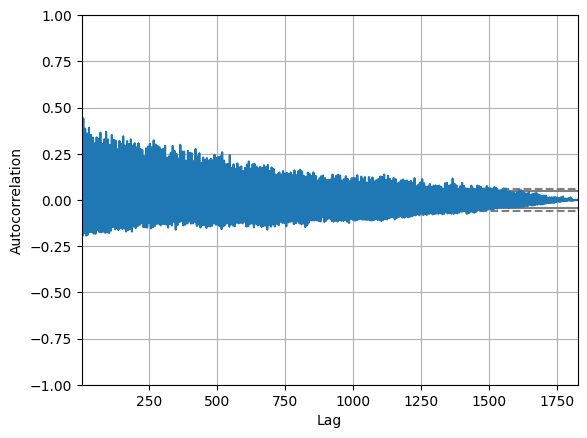

In [178]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(group_df_copy['phase'])

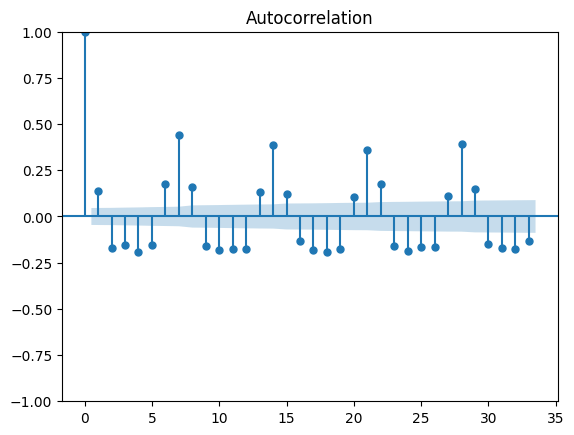

In [180]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(group_df_copy['phase'])
plt.show()

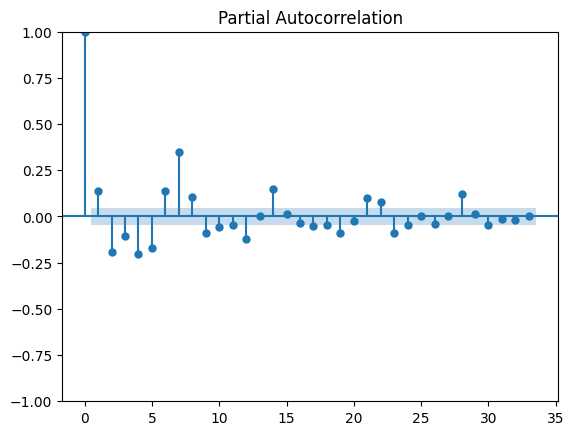

In [181]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(group_df_copy['phase'], method='ywm')
plt.show()

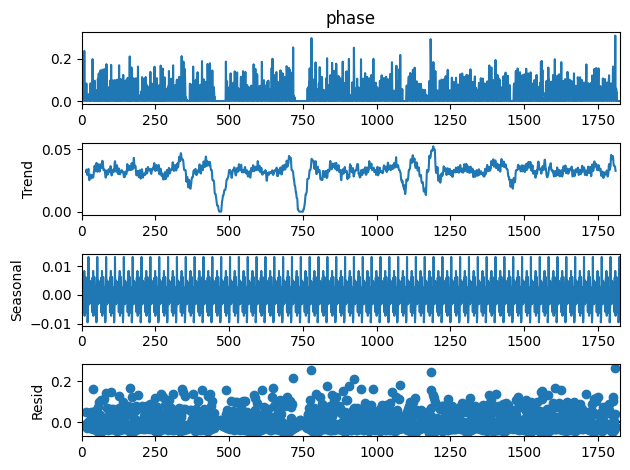

In [182]:
decomposition=seasonal_decompose(group_df_copy['phase'],model='additive',period=30)
decomposition.plot()
plt.show()

In [183]:
dftest = adfuller(group_df_copy.phase, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -9.399750853467518
2. P-Value :  6.233536161225414e-16
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1802
5. Critical Values :
	 1% :  -3.4339840952648695
	 5% :  -2.8631452508003057
	 10% :  -2.567624583142913


In [184]:
import pmdarima as pmd

In [186]:
model=pmd.auto_arima(group_df_copy['phase'],start_p=1,start_q=1,test='adf',d=30,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,30,1)(0,0,0)[0]             : AIC=6.000, Time=14.13 sec
 ARIMA(0,30,0)(0,0,0)[0]             : AIC=2.000, Time=5.67 sec
 ARIMA(1,30,0)(0,0,0)[0]             : AIC=4.000, Time=11.05 sec
 ARIMA(0,30,1)(0,0,0)[0]             : AIC=103.435, Time=9.26 sec
 ARIMA(0,30,0)(0,0,0)[0] intercept   : AIC=126.814, Time=5.19 sec

Best model:  ARIMA(0,30,0)(0,0,0)[0]          
Total fit time: 45.320 seconds


In [187]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima=SARIMAX(group_df_copy['phase'],order=(3,0,0),seasonal_order=(1,0,0,30))
predicted=sarima.fit().predict();predicted

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51208D+00    |proj g|=  1.00955D+00

At iterate    5    f= -1.51467D+00    |proj g|=  1.10288D+00

At iterate   10    f= -1.53706D+00    |proj g|=  1.04102D-01

At iterate   15    f= -1.53771D+00    |proj g|=  7.55502D-01

At iterate   20    f= -1.53931D+00    |proj g|=  2.60749D-02

At iterate   25    f= -1.53996D+00    |proj g|=  8.09644D-02

At iterate   30    f= -1.53997D+00    |proj g|=  2.74004D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

0       0.000000
1       0.000000
2       0.000000
3       0.022668
4       0.036889
          ...   
1821    0.000453
1822   -0.000112
1823   -0.000386
1824   -0.003580
1825   -0.000080
Name: predicted_mean, Length: 1826, dtype: float64

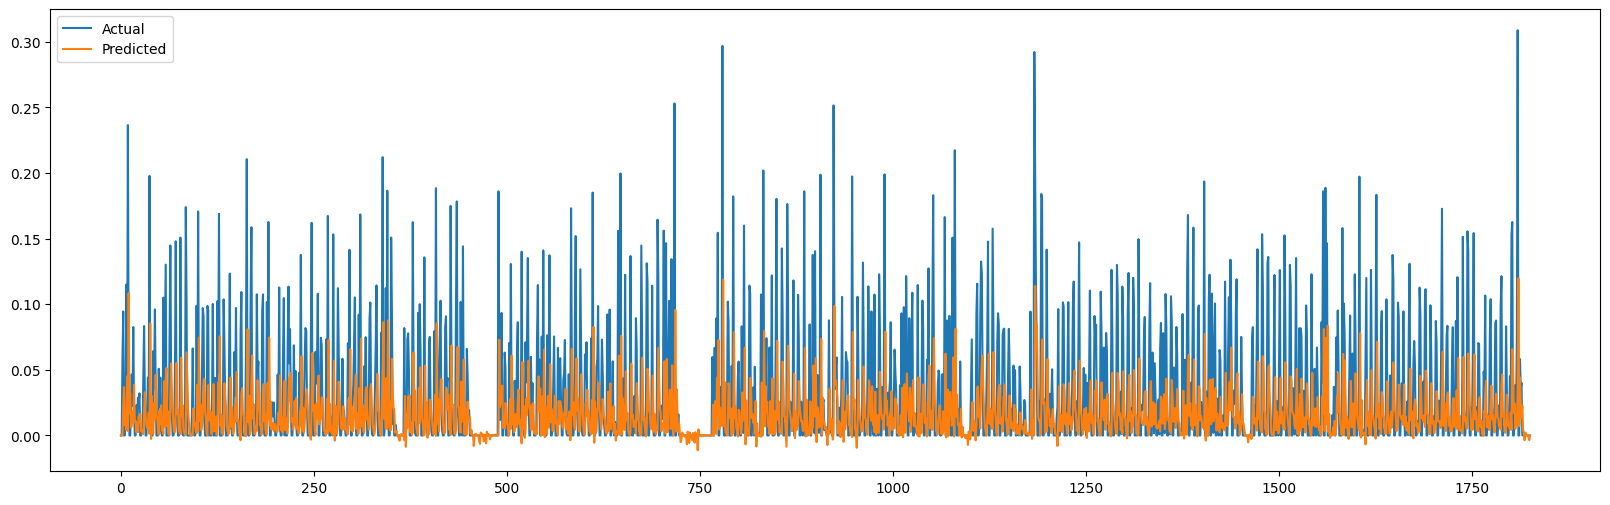

In [189]:
plt.figure(figsize=(20,6))
plt.plot(group_df_copy['phase'],label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

In [190]:
resid=group_df_copy['phase']-predicted;resid
mae=abs(resid.mean());mae


0.015713042351884334

In [45]:
sarima1=SARIMAX(group_df['phase'],order=(3,0,0),seasonal_order=(1,0,0,12))
predicted1=sarima1.fit().predict();predicted1

/Users/deb/Desktop/Raj_data/Novartis-datathon-2023/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deb/Desktop/Raj_data/Novartis-datathon-2023/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.30776D+00    |proj g|=  2.86533D+00

At iterate    5    f= -1.37801D+00    |proj g|=  1.35130D+00

At iterate   10    f= -1.38185D+00    |proj g|=  8.14356D-01

At iterate   15    f= -1.39556D+00    |proj g|=  4.01467D-01

At iterate   20    f= -1.39795D+00    |proj g|=  2.80457D-02

At iterate   25    f= -1.39920D+00    |proj g|=  1.18064D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     49      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


date
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    0.025243
2013-01-07    0.041378
2013-01-08    0.024397
                ...   
2018-02-21    0.038772
2018-02-22    0.052585
2018-02-23    0.055510
2018-02-26    0.037076
2018-02-27    0.024847
Name: predicted_mean, Length: 1249, dtype: float64